### **Pandas basic**

- [https://pandas.pydata.org/](https://pandas.pydata.org/)

* [https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

- [10 minutes to pandas — pandas 1.0.0 documentation](https://pandas.pydata.org/pandas-docs/version/1.0.0/getting_started/10min.html)

In [5]:
# 10 min. pd : 읽어보는데 10분 실행(책 한권분량)하는데 2시간정도. 

In [6]:
import pandas as pd

### **DateFrame**

In [ ]:
# 공식문서(도움말) 활용하기
# pd.DataFrame?
# pd.DataFrame(shift + tab)

In [7]:
pd.DataFrame?
# == pd.DataFrame() 후 shift + tab

Init signature:
pd.DataFrame(
    data=None,
    index: 'Axes | None' = None,
    columns: 'Axes | None' = None,
    dtype: 'Dtype | None' = None,
    copy: 'bool | None' = None,
)
Docstring:     
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index.

    .. versionchanged:: 0.25.0
       If data is a list of dicts, column order follows insertion-order.

index : Index or array-like
    Index to use for resulting frame. Will default to 

In [8]:
df = pd.DataFrame(
{"a" : [4, 5, 6], 
"b" : [7, 8, 9], 
"c" : [10, 11, 12]},    
index = [1, 2, 3])

In [9]:
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [11]:
# dateframe (2차원구조, 행렬)
df[["a"]]

,a
1,4
2,5
3,6


### **Series**

In [12]:
# series (1차원구조 , 벡터)
df["a"]

1    4
2    5
3    6
Name: a, dtype: int64

### **Subset**

In [14]:
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [15]:
df["a"] > 4

1    False
2     True
3     True
Name: a, dtype: bool

In [16]:
df[df["a"] > 4]

,a,b,c
2,5,8,11
3,6,9,12


In [17]:
df["a"]

1    4
2    5
3    6
Name: a, dtype: int64

In [18]:
df["a", "b"] # keyerror 발생 ->따라서 두 개이상 컬럼 가져올때눈 항상 dateFrame형태로..

KeyError: ('a', 'b')

In [19]:
df[["a","b"]]

,a,b
1,4,7
2,5,8
3,6,9


### **Summarize Date**

In [20]:
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [21]:
df["a"].value_counts()

4    1
5    1
6    1
Name: a, dtype: int64

In [28]:
df1 = pd.DataFrame(
{"a" : [4, 5, 6, 4], 
"b" : [7, 8, 9, 9], 
"c" : [10, 11, 12, 10]},    
index = [1, 2, 3, 4])

df1

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12
4,4,9,10


In [23]:
df1["a"].value_counts()

4    2
5    1
6    1
Name: a, dtype: int64

In [25]:
len(df), len(df1)

(3, 4)

### **Reshaping**

#### **Sort_values, drop**

In [27]:
df1

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12
4,4,9,10


In [29]:
df1["a"].sort_values() # a열 기준 정렬

1    4
4    4
2    5
3    6
Name: a, dtype: int64

In [30]:
df1.sort_values("a") # 전체에서 a값 기준정렬

,a,b,c
1,4,7,10
4,4,9,10
2,5,8,11
3,6,9,12


In [31]:
df1.sort_values("a", ascending = False) # 위에 값을 역순으로 정렬

,a,b,c
3,6,9,12
2,5,8,11
1,4,7,10
4,4,9,10


In [35]:
df1.drop(["c"], axis = 1) # 행을 기준으로 c열 drop

,a,b
1,4,7
2,5,8
3,6,9
4,4,9


In [39]:
df2 = df1.drop(["c"], axis = 1)
df2

,a,b
1,4,7
2,5,8
3,6,9
4,4,9


### **Group Date**

#### **Groupbym pivot_table**

In [40]:
# pivot : 형태만 바꿈
# pivot_table : 값 연산도 가능

In [43]:
df2

,a,b
1,4,7
2,5,8
3,6,9
4,4,9


In [44]:
df2.groupby(["a"])["b"].mean()
# a열을 기준으로 group by(a애 따라 집단을 나누다) 해서 b열의 평균을 구함

a
4    8.0
5    8.0
6    9.0
Name: b, dtype: float64

In [47]:
df2.groupby(["a"])["b"].agg(["mean", "sum", "count"]) 
# aggregation (데이터)종합

,mean,sum,count
a,,,
4,8.0,16,2
5,8.0,8,1
6,9.0,9,1


In [48]:
df2.groupby(["a"])["b"].describe()

,count,mean,std,min,25%,50%,75%,max
a,,,,,,,,
4,2.0,8.0,1.414214,7.0,7.5,8.0,8.5,9.0
5,1.0,8.0,NaN,8.0,8.0,8.0,8.0,8.0
6,1.0,9.0,NaN,9.0,9.0,9.0,9.0,9.0


In [50]:
pd.pivot_table(df2, index="a") # agg 기본값이 "mean"

,b
a,
4,8
5,8
6,9


In [52]:
df2 
# a의 4 값은 b의 7,9 ㅡ> 7,9의 평균값 =8

,a,b
1,4,7
2,5,8
3,6,9
4,4,9


In [53]:
pd.pivot_table(df2, index="a", values="b")

,b
a,
4,8
5,8
6,9


In [54]:
pd.pivot_table(df2, index="a", values="b", aggfunc="sum") 
# agg가 "mean"이 아닌 "sum"

,b
a,
4,16
5,8
6,9


### **Plotting**

<AxesSubplot:>

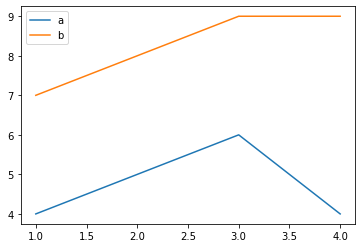

In [55]:
df2.plot()

In [56]:
# "df2.plot." + tab키 = 다양한 그래프 고를수 있음

<AxesSubplot:>

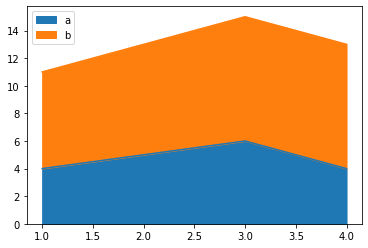

In [58]:
df2.plot.area()

<AxesSubplot:>

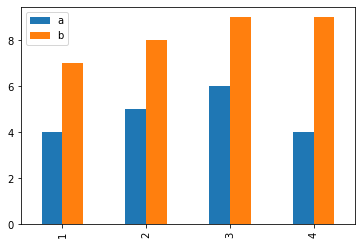

In [59]:
df2.plot.bar()

<AxesSubplot:ylabel='Density'>

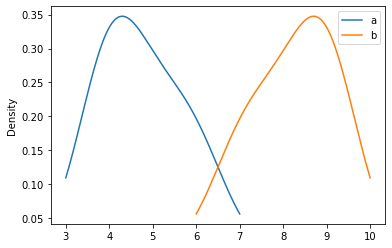

In [ ]:
df2.plot.density()

***